In [970]:
import matplotlib.pyplot as plt
import numpy as np
from ripser import ripser, Rips
from persim import plot_diagrams
from sklearn.datasets import make_circles, make_blobs, make_moons, load_wine, load_breast_cancer, load_iris
import random

One may need to install the ripser module, please use the :
https://pypi.org/project/ripser/

# 1. Introduction to basic objects

In this kernel I would like to present a topological approach to data analysis. It comes from a branch of mathematics called algebraic topology, that uses algebraic tools over topological structures. To understand mathematics that is behind counstructions used here, one needs some knowledge from algebraic topology, especially from the homology theory. Nevertheless, the below script does not require any such basics, since I use only intuitive and graphical intepretation of the whole concept in the below.

Basic objects studied in algebraic topology are simplexes and simplicial complexes. We distinguish simplexes due to dimensionality: 0-simplexes are just points, 1-simplexes are lines, 2-simplexes are triangles etc., shortly, to obtain n-simplex we take n+1 points and the convex hull spanned on them Below there are examples, that can be drown on the 2D-plane .

(0.0, 1.0, 0.0, 1.0)

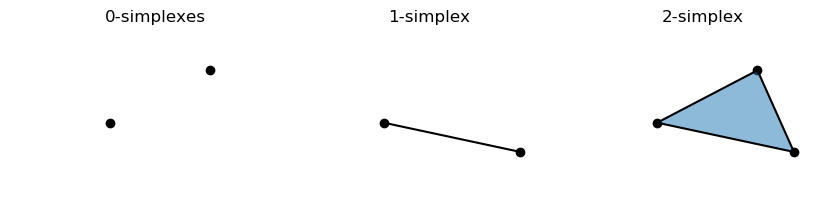

In [972]:
x, y= [.3, .9, .74, .76], [.4, .21, .74, .18]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(10,2))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.scatter([x[0], x[2]], [y[0], y[2]], c='black')
ax1.title.set_text('0-simplexes')
ax1.axis('off')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.scatter(x[:2], y[:2], c='black')
ax2.plot([x[0], x[1]],[y[0], y[1]], c='black')
ax2.title.set_text('1-simplex')
ax2.axis('off')
ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
ax3.scatter(x[:3], y[:3], c='black')
ax3.plot([x[0],x[1]],[y[0],y[1]], c='black')
ax3.plot([x[1],x[2]],[y[1],y[2]], c='black')
ax3.plot([x[0],x[2]],[y[0],y[2]], c='black')
ax3.fill_between([x[2], x[0], x[1], x[2]], [y[2], y[0], y[1], y[2]], alpha=.5)
ax3.title.set_text('2-simplex')
ax3.axis('off')

Simplicial complexes are bulit from simplexes, the dimension is induced from the highest dimension through simplexes. Below we can see 2 dimensional simplicial complex that is built from three 2-simplexes and two 1-simplexes.

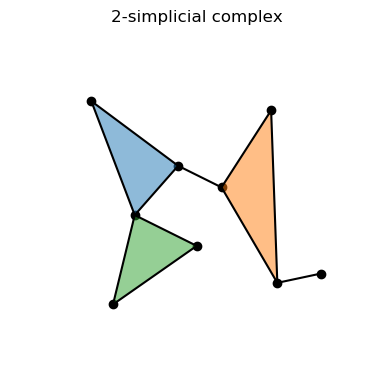

In [371]:
x, y= [.3, .9, .74, .76, .23, .44, .16, .58, .5], [.4, .21, .74, .18, .11, .56, .77, .49, .3]
fig, ax = plt.subplots(1, figsize=(4, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.scatter(x, y, c='black')
ax.plot([x[0],x[6]],[y[0],y[6]], c='black')
ax.plot([x[0],x[5]],[y[0],y[5]], c='black')
ax.plot([x[6],x[5]],[y[6],y[5]], c='black')
ax.fill_between([x[0], x[6], x[5], x[0]], [y[0], y[6], y[5], y[0]], alpha=.5)
ax.plot([x[4],x[0]],[y[4],y[0]], c='black')
ax.plot([x[7],x[5]],[y[7],y[5]], c='black')
ax.plot([x[7],x[2]],[y[7],y[2]], c='black')
ax.plot([x[7],x[3]],[y[7],y[3]], c='black')
ax.plot([x[2],x[3]],[y[2],y[3]], c='black')
ax.fill_between([x[7], x[3], x[2], x[7]], [y[7], y[3], y[2], y[7]], alpha=.5)
ax.plot([x[1],x[3]],[y[1],y[3]], c='black')
ax.plot([x[0],x[8]],[y[0],y[8]], c='black')
ax.plot([x[4],x[8]],[y[4],y[8]], c='black')
ax.fill_between([x[0], x[8], x[4], x[0]], [y[0], y[8], y[4], y[0]], alpha=.5)
ax.axis('off')
ax.title.set_text('2-simplicial complex')

# 2. 0-connectedness - construction and intuition

Topological data analysis can be useful for example for looking a number of clusters in a data set - for high-dimensional, numerical data we might encounter dificulties with that task. Roughly speaking, the process is following: let us state that our data points are 0-simplexes. We will observe how change the connectedness of a dataset and we 'build' connected components for that. Connected components number is just a number of connected subsets in the dataset. It can be visualise as taking balls (with same radius), centered at each point of our data, and looking what happens once the radius is growing. It starts from zero (balls are equal to points) up to the set parameter. For enough small radius, each ball is separated from the rest one (each point is conncected component itself). Once the radius grows, each ball starts to touch its neighbors and, clearly, it happens firstly for points which are relatively close to eachother. Once two balls are intersected or more precisely, once the edge of the ball touches another point, then we can imagine we draw an interval (a line) that connects these two points. Since then, these two points belong into one connected component. For understanding what 0-connectedness means, let us state that the boundary of each segment (interval) is made from its start and end points, similarly, like the circle (1-dimensional sphere) is the boundary of the 2-dimensional disc. Since each point has 0-dimension, we say that two points connected by a line, are connected of dimension 0, or simply 0-connected. We used to relate dimension with boundary because of mathematical foundations which stay behind. Since connectedness can posses dimensionality, clearly, wholes (which are the opposite) can posses them too. It might be not really clear, till we go into the higher dimension, anyway the below step-by-step explanation should help with the intuition.

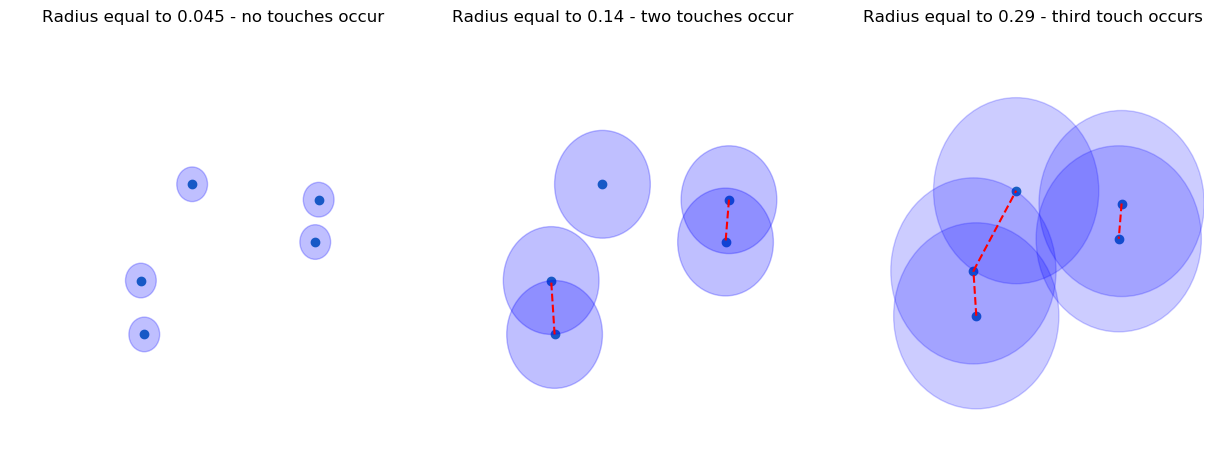

In [748]:
x, y = [.3, .29, .44, .81, .8], [.21, .35, .6, .56, .45]

def line_ax2(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    ax2.plot([x1,x2],[y1,y2],'r--')

def line_ax3(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    ax3.plot([x1,x2],[y1,y2],'r--')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.scatter(x, y)
ax1.title.set_text('Radius equal to 0.045 - no touches occur')
ax1.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), .045 , color='b', fill=True, alpha=.25)
    ax1.add_artist(ball_2d)

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.scatter(x, y)
line_ax2(x,y,0,1)
line_ax2(x,y,3,4)
ax2.title.set_text('Radius equal to 0.14 - two touches occur')
ax2.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), .14 , color='b', fill=True, alpha=.25)
    ax2.add_artist(ball_2d)

ax3.set_xlim([-.1, 1.1])
ax3.set_ylim([-.1, 1.1])
ax3.scatter(x, y)
line_ax3(x,y,0,1)
line_ax3(x,y,1,2)
#line_ax3(x,y,0,2)
line_ax3(x,y,3,4)
ax3.title.set_text('Radius equal to 0.29 - third touch occurs')
ax3.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), 0.29 , color='b', fill=True, alpha=.2)
    ax3.add_artist(ball_2d)

Clearly, all points that are relatively close to eachother will be connected shortly by relatively small radius. After that, intuitively, there should be any new line created for sometime, till our balls are large enough to connect separated cluster of points. We say that connected components is born, when the radius starts growing (again, at the beginning each point is separate connected component so we count from radius equal to 0) and is going to die, when two balls touch eachother and create one common connected component.

In algebraic topology, n-th homology groups are quotient groups which measure the number of n-dimensional wholes in some structure, usually there is no parameter that vary, the set or structure is stable and we compute homology groups once. That process is not trivial, fortunately the Ripser library allows us to compute n-homologies and moreover, it shows how they change for variuos values of the radius. Therefore the below plot is called Persistent Homology Plot. Both axis are associated with values of radius - each point represents the connected component that was 'born' for the radius equal to 0, and 'died' later, for some greater value of the radius. Moreover, we do not care about points on dashed lines. Using ripser module we can list all coordinates of the below points, as presented:

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)

One can find precise points, where each connected component starts/dies:

 [[0.         0.11045361]
 [0.         0.14035669]
 [0.         0.2915476 ]
 [0.         0.37215587]
 [0.                inf]]


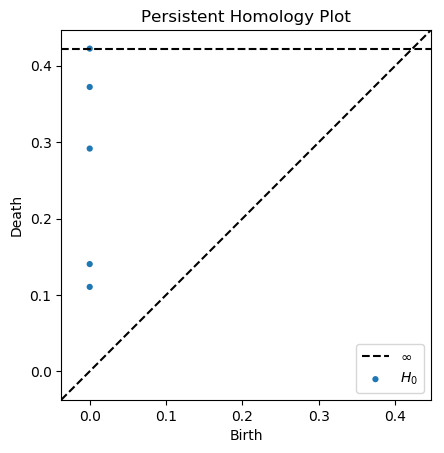

In [751]:
data = np.array([x, y]).T
rips = Rips(maxdim=0)
dgms = rips.fit_transform(data)
#dgms = ripser(data, maxdim=0)['dgms']
print('\nOne can find precise points, where each connected component starts/dies:\n\n', dgms[0])   
plt.title('Persistent Homology Plot')
rips.plot(dgms, show=True)
plt.show() 

We can also look closer of what happens in particular points. On the below left plot, we can see that for radius equal to 0.11045361, it is the first time once the edge of a ball touches another point. On the right plot, we can observe the first blue point, which 'describes' that situation.

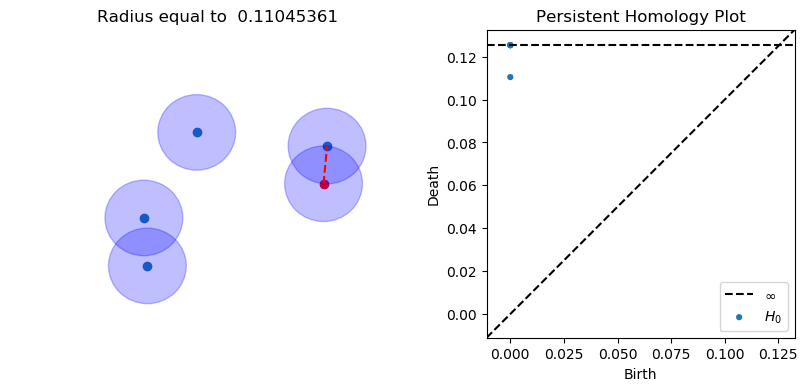

In [731]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, .9])
ax1.scatter(x[:4], y[:4])
ax1.scatter(x[4], y[4], c='r')
ax1.plot([x[4],x[3]],[y[4],y[3]],'r--')
ax1.title.set_text('Radius equal to  0.11045361')
ax1.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), dgms[0][0][1] , color='b', fill=True, alpha=.25)
    ax1.add_artist(ball_2d)
dgms = ripser(data, maxdim=0, thresh=.14)['dgms']
plt.title('Persistent Homology Plot')
plot_diagrams(dgms, show=True)
plt.show()

Once the radius is growing, we are waiting to next touch, which occurs for the radius is equal to 0.14035669, as presented below. Since that touching turns two (so far separated) connected components into the new one, on the below left plot, there are 3 connected components (we have started with 5).

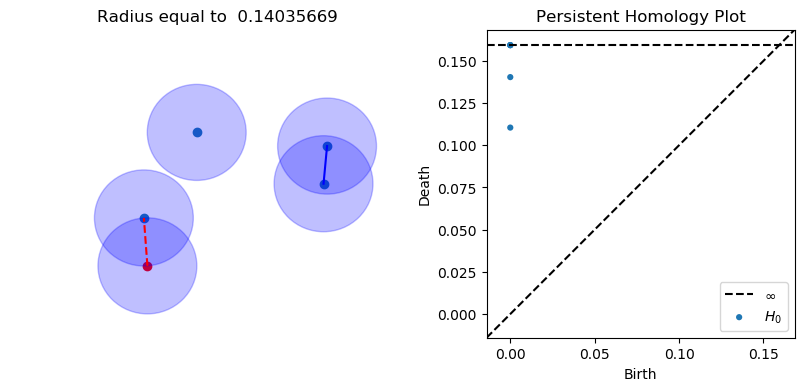

In [752]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, .9])
ax1.scatter(x[1:], y[1:])
ax1.scatter(x[0], y[0], c='r')
ax1.plot([x[4],x[3]],[y[4],y[3]],'b-')
ax1.plot([x[0],x[1]],[y[0],y[1]],'r--')
ax1.title.set_text('Radius equal to  0.14035669')
ax1.axis('off')
for i in range(len(x)):
    ball_ax1 = plt.Circle((x[i], y[i]), dgms[0][1][1] , color='b', fill=True, alpha=.25)
    ax1.add_artist(ball_ax1)   
dgms = ripser(data, maxdim=0, thresh=.15)['dgms']
plt.title('Persistent Homology Plot')
plot_diagrams(dgms, show=True)
plt.show()

Next touch occurs for the radius equal to 0.2915476, as presented below - there are only two connected components from now. Finally, for the radius = 0.37215587, all five points are connected, which obviusly means that there is only one connected component. On the down right plot we can see four blue points that describe that process.

Rips(maxdim=0, thresh=0.35, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=0.65, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


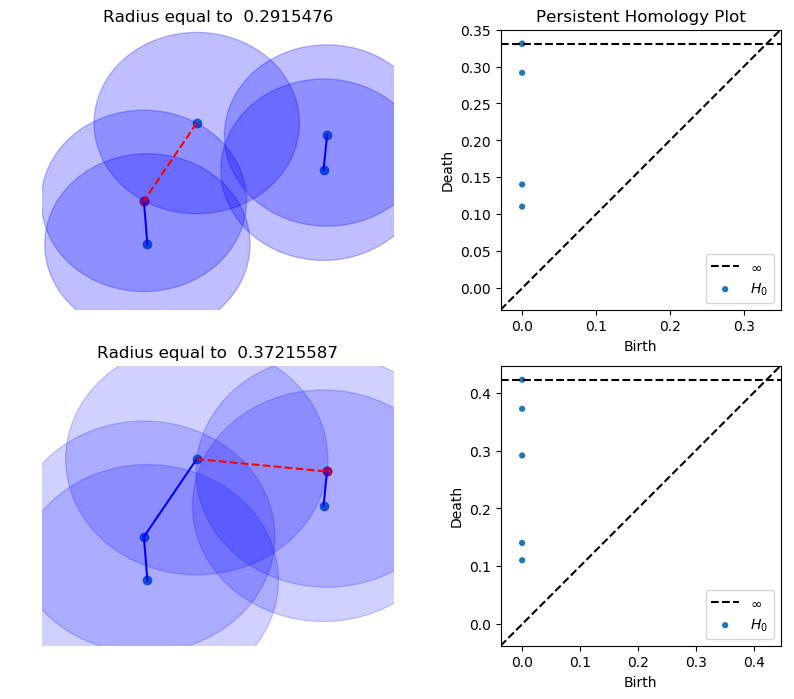

In [762]:
rips_ax2 = Rips(maxdim=0, thresh=.35)
rips_ax4 = Rips(maxdim=0, thresh=.65)
dgms_ax2 = rips_ax2.fit_transform(data)
dgms_ax4 = rips_ax4.fit_transform(data)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

ax1.set_xlim([0, 1])
ax1.set_ylim([0, .9])
ax1.scatter(x, y)
ax1.scatter(x[1], y[1], c='r')
ax1.plot([x[4],x[3]],[y[4],y[3]],'b-')
ax1.plot([x[0],x[1]],[y[0],y[1]],'b-')
ax1.plot([x[2],x[1]],[y[2],y[1]],'r--')
ax1.title.set_text('Radius equal to  0.2915476')
ax1.axis('off')
ax3.set_xlim([0, 1])
ax3.set_ylim([0, .9])
ax3.scatter(x, y)
ax3.plot([x[4],x[3]],[y[4],y[3]],'b-')
ax3.plot([x[0],x[1]],[y[0],y[1]],'b-')
ax3.plot([x[2],x[1]],[y[2],y[1]],'b-')
ax3.plot([x[2],x[3]],[y[2],y[3]],'r--')
ax3.title.set_text('Radius equal to  0.37215587')
ax3.scatter(x[3], y[3], c='r')
ax3.axis('off')    
ax2.title.set_text('Persistent Homology Plot')

for i in range(len(x)):
    ball_ax1 = plt.Circle((x[i], y[i]), dgms_ax2[0][2][1] , color='b', fill=True, alpha=.25)
    ball_ax3 = plt.Circle((x[i], y[i]), dgms_ax4[0][3][1] , color='b', fill=True, alpha=.18)
    ax1.add_artist(ball_ax1)
    ax3.add_artist(ball_ax3)

rips.plot(dgms_ax2, show=False, ax=ax2)
rips.plot(dgms_ax4, show=False, ax=ax4)

plt.show()

We can easily check that even for bigger radius no more points appear on the persistent homology plot. With no set parameter thresh, it's equal to infinity as default.

In [548]:
dgms = ripser(data, maxdim=0)['dgms']
print(dgms[0])

[[0.         0.11045361]
 [0.         0.14035669]
 [0.         0.2915476 ]
 [0.         0.37215587]
 [0.                inf]]


# 3. 0-homologies on make_moons dataset

Now let us check how the above theory behave on well known, make_moons dataset. Firstly we present only half to compare it later with the full one.

In [851]:
def create_half_moons_with_balls_and_0_homologies(n_samples, noise=.1, radius=np.inf, maxdim=0):
    if radius>.4:   ## i wanted to avoid too large balls on the plot
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    data, labels = make_moons(n_samples, noise=noise, shuffle=True, random_state=42)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    title = 'Radius = ' + str(radius_homology)
    ax1.title.set_text(title)
    ax1.set_xlim([np.min(data[:,0][labels==0])-.2, np.max(data[:,0][labels==0])+.2])
    ax1.set_ylim([np.min(data[:,1][labels==0])-.2, np.max(data[:,1][labels==0])+.2])
    ax1.scatter(data[:,0][labels==0], data[:,1][labels==0], c=labels[labels==0], cmap=plt.get_cmap('winter'))
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False)
            ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')     
    dgms = ripser(data[labels==0], maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    plt.show()
    differences = []
    if radius_homology==np.inf:
        for i in range(int(n_samples/2)-2):
            differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
        diff_mean = np.mean(np.array(differences)[:,1])
        diff_std = np.std(np.array(differences)[:,1])
        print('The average distance between persistent homology points is',diff_mean,'. The standard deviation equals ',diff_std)   

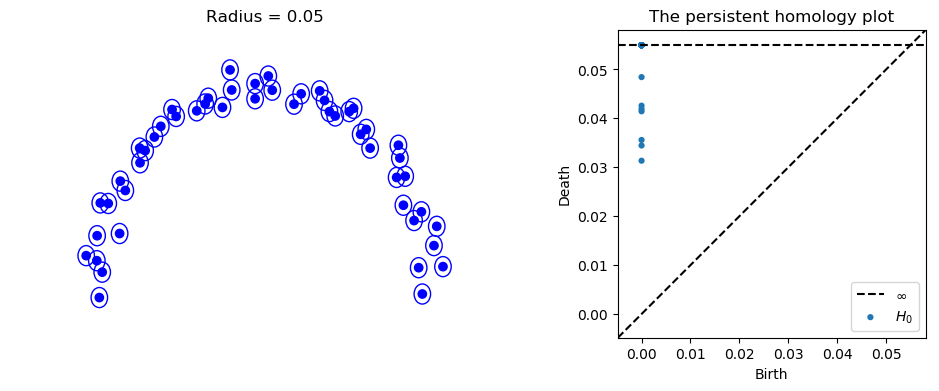

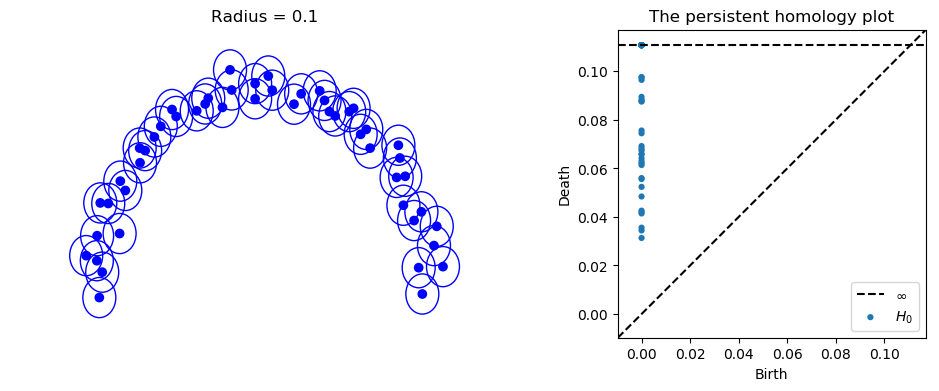

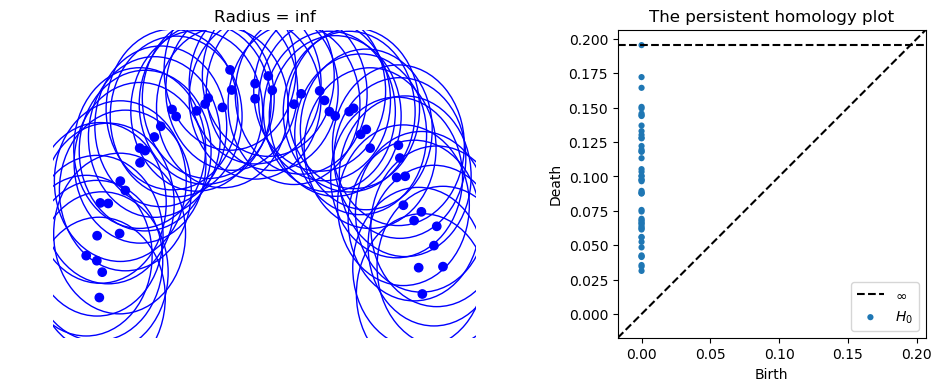

The average distance between persistent homology points is 0.0029333382844924927 . The standard deviation equals  0.0030413559964297342


In [852]:
create_half_moons_with_balls_and_0_homologies(100, .05, .05)
create_half_moons_with_balls_and_0_homologies(100, .05, .1)
create_half_moons_with_balls_and_0_homologies(100, .05) ##no radius parameter means it's equal to infinity, so we can check on the right plot what is the biggest value of radius once the last death occurs

On the above plot, we can see that the 'last death' occurs for radius equal to +/- 0.175. Points on the persistent homology plot are relatively close to eachother, which would mean there is only one cluster in dataset. Let us see, how the plot will look for the full make_moon plot.

In [846]:
def create_moons_with_balls_and_0_homologies(n_samples, noise=.1, radius=.05, maxdim=0):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    data, labels = make_moons(n_samples, noise=noise, shuffle=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels, cmap=plt.get_cmap('winter'))
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False)
            ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False)
            ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-1]),2)
    second_last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-2]), 2)
    differences = []
    for i in range(n_samples-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    print('The value of radius once the last death occurs, is equal to', last_death, ', the second last death occurs for radius', second_last_death, '.\nThe difference between last two deaths is', np.round(last_death-second_last_death, 5), 'once the average difference between each next two points is', np.round(diff_mean, 5))
    plt.show()

The value of radius once the last death occurs, is equal to 0.42 , the second last death occurs for radius 0.22 .
The difference between last two deaths is 0.2 once the average difference between each next two points is 0.00423


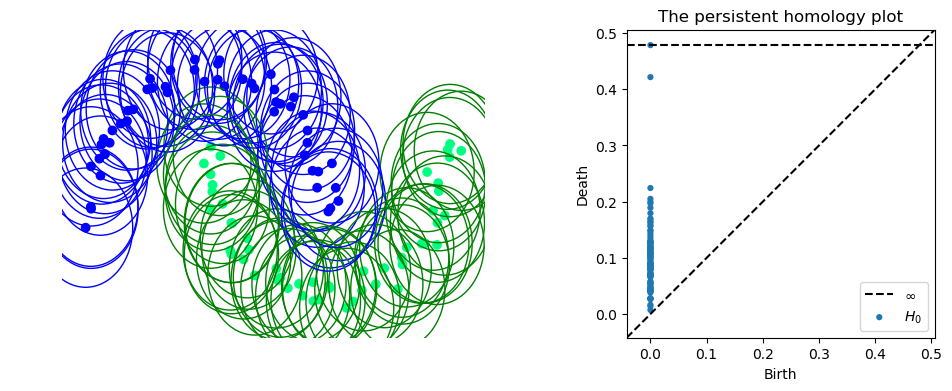

In [848]:
create_moons_with_balls_and_0_homologies(100, .06, 1)

Once we can see a single point on persistent homology diagram, if often means that we have another cluster or, at least, some huge outlier.

# 4. 1-connectedness - construction and intuition

As we remember, our data points represent 0-simplexes, and so far we have been concidering only lines that can connect our data points. These lines simply represent 1-simplexes. So topologically speaking, so far we were creating 1-dimensional simplicial complexes with the respect of radius - once all points were connected, we got the final simplicial complex, that includes all data points. As it was mentioned at the begginig, simplexes can posses more than 0 or 1 dimension. We are going to check what properties can be measured using higher dimensional simplices, in other words we are going to check the dimension of the connectedness. For those who are not familiar with topology at all, by checking the dimensionality of the connectedness we can observe various properties of our data. Firstly, let us state that the boundary of each segment (interval) is made from its start and end points, similarly, like the circle (1-dimensional sphere) is the boundary of the 2-dimensional disc. Since each point has 0-dimension, we say that two points connected by a line, are connected of dimension 0, or simply 0-connected. Since connectedness can posses dimensionality, clearly, wholes (which are the opposite) can posses them too. It might be not really clear, till we go into the higher dimension.

There are two plots below, both are connected sets. However, it's clear that the right one, seems to be connected better somehow. That's because we are able to go between red and green points directly, once on the left picture, additionally we need to go through one more point. Because one had to classify how to measure connectedness, how to express that some systems can be connected better or stronger than another, we use dimensionality to describe the level of the connectedness. The key word that we can use looking on the right plot is a loop. Existing of a loop means that we can start from some point, choose the direction, 'walk' through another points and finish in the start one.

(-1.0, 3.0, -1.0, 2.0)

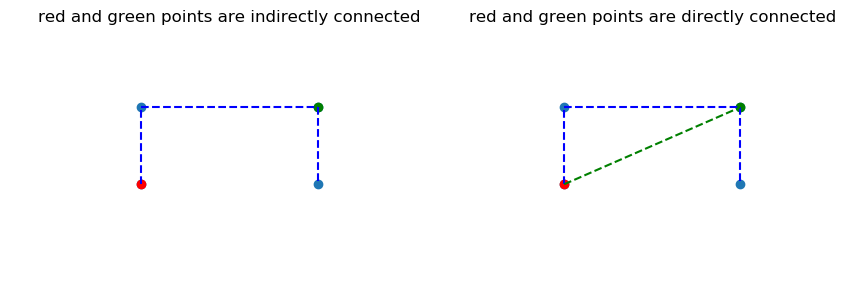

In [741]:
x, y = [0, 0, 2, 2], [0, 1, 0, 1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.set_xlim([-1, 3])
ax1.set_ylim([-1, 2])
ax1.scatter(x, y)
ax1.scatter(x[0], y[0], c='r')
ax1.scatter(x[3], y[3], c='g')
ax1.plot([x[0],x[1]],[y[0],y[1]],'b--')
ax1.plot([x[3],x[2]],[y[3],y[2]],'b--')
ax1.plot([x[1],x[3]],[y[1],y[3]],'b--')
ax1.title.set_text('red and green points are indirectly connected')
ax1.axis('off')
ax2.set_xlim([-1, 3])
ax2.set_ylim([-1, 2])
ax2.scatter(x, y)
ax2.scatter(x[0], y[0], c='r')
ax2.scatter(x[3], y[3], c='g')
ax2.plot([x[0],x[1]],[y[0],y[1]],'b--')
ax2.plot([x[3],x[2]],[y[3],y[2]],'b--')
ax2.plot([x[1],x[3]],[y[1],y[3]],'b--')
ax2.plot([x[0],x[3]],[y[0],y[3]],'g--')
ax2.title.set_text('red and green points are directly connected')
ax2.axis('off')

The crucial thing with loops is that each loop (closed loop to be precise) has an interior. On the below left plot it's simply a triangle. We said that each interval is of the dimension one, and therefore its bondaries (start/end points) are of dimension zero. Our loop has two dimensional interior - it's called height and weight (as usual for a triangle on a plane). The boundary of loop's interior is just the loop itself - on the right plot we can easily see three intervals that create the boundary of the triangle. Like previously for 'line-connected' points, we called them 0-connected because points (interval's boundary) are of dimension zero, now we say that below blue points are 1-connected, since the boundary of a 2-dimensional interior is the 1-dimensional loop (line or interval has one dimension. Let us summarize that. On the left plot we can see four points, all are 0-connected with themselfes, but only three are 1-connected. In the language of wholes, we can say that there is no 0-whole, but there are 1-wholes (they exists till red point is not connected with the rest points). On the other hand a standard triangle is 0- and 1-connected. Generally speaking, in algebraic topology we say that n-th homology gruops count the numebr of n-dimensional wholes (or n-dimensional connected components) for geometrical structures called simplicial complexes.

(-1.0, 3.0, -1.0, 2.0)

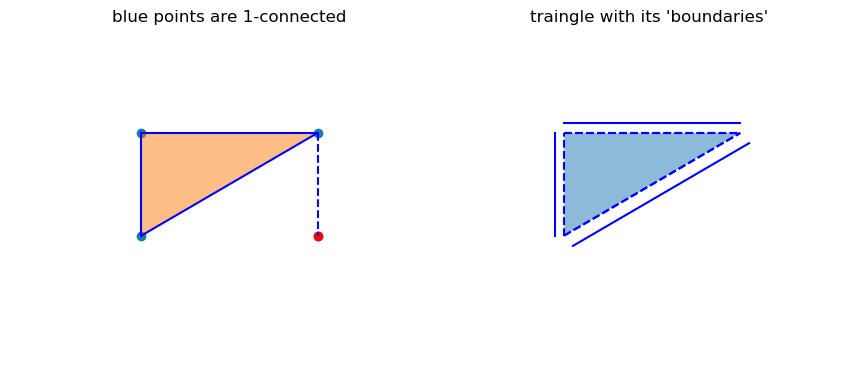

In [742]:
x, y = [0, 0, 2, 2], [0, 1, 0, 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([-1, 3])
ax1.set_ylim([-1, 2])
ax1.scatter(x, y)
ax1.scatter(x[2], y[2], c='r')
ax1.plot([x[0],x[1]],[y[0],y[1]],'b-')
ax1.plot([x[3],x[2]],[y[3],y[2]],'b--')
ax1.plot([x[1],x[3]],[y[1],y[3]],'b-')
ax1.plot([x[0],x[3]],[y[0],y[3]],'b-')
ax1.fill_between([x[0], x[2], x[1]], [y[0], y[3], y[1]], alpha=.5)
ax1.title.set_text("blue points are 1-connected")
ax1.axis('off')
ax2.set_xlim([-1, 3])
ax2.set_ylim([-1, 2])
ax2.plot([x[0]-.1,x[1]-.1],[y[0],y[1]],'b-')
ax2.plot([x[0],x[2]],[y[1]+.1,y[3]+.1],'b-')
ax2.plot([x[0]+.1,x[2]+.1],[y[0]-.1,y[1]-.1],'b-')
ax2.plot([x[1],x[3]],[y[1],y[3]],'b--')
ax2.plot([x[0],x[3]],[y[0],y[3]],'b--')
ax2.plot([x[0],x[1]],[y[0],y[1]],'b--')
ax2.plot([x[1],x[3]],[y[1],y[3]],'b--')
ax2.plot([x[0],x[3]],[y[0],y[3]],'b--')
ax2.fill_between([x[0], x[2], x[1]], [y[0], y[3], y[1]], alpha=.5)
ax2.title.set_text("traingle with its 'boundaries' ")
ax2.axis('off')

One could ask why do we want to measure the level of connectedness. We talked about clusters number looking but there can be another useful applications. For IT world it means the tool which measure connectednes of graphs. The radius each time can be any paramter that can change (not necesserily in time). Let us imagine that our points are websites, and lines between them are direct links from one website to the another (we should use arrows instead of lines to point the direction of link then). Clearly, sites with many arrows are most popular, but many arrows going from/in some point mean that probably that point is high dimensional connected with another ones - that is what usual homology theory can be used to. Using persistance homology we can also observe how the popularity change with the respect to the set radius.

The rule how to inteprest point on persistent diagram is similar as previously. The only change is that 1-homology points were not born for radius equal to zero. Each point starts to appear, once the radius is big enough, to connect some points and turn them into a loop. It dies, once the whole inside the loop disappears (is covered by balls).

In the below set, we can see two general places where the loops occur. The first can happen between few points that are close to eachother, the second one is the big whole inside the 'circle'. Looking on the persistent homology diagram (now including also 1-connectedness - the first homologies), we can see that there are some orange points around coordinate (0.25, 0.4) - they are associated with small loops, and there is single point around coordinate (0.3, 1.2) once the big wholes disappeared.

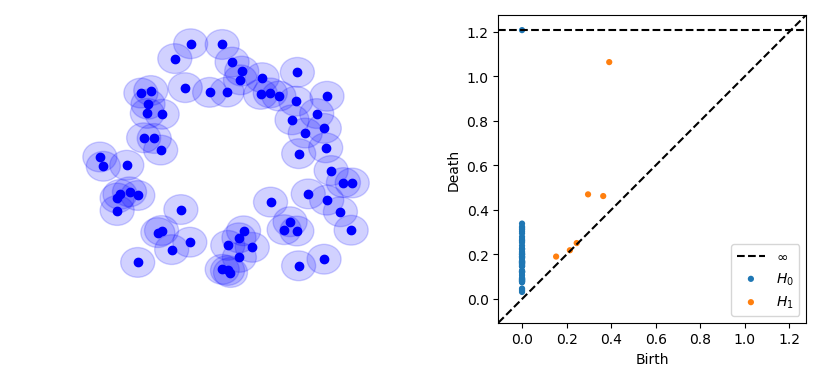

In [843]:
data, labels = make_circles(n_samples=65, shuffle=True, noise=.12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.scatter(data[:,0], data[:,1], c='b')
ax1.axis('off')
for i in range(len(data)):
    ball_2d = plt.Circle((data[i,0], data[i,1]), .145  , color='b', fill=True, alpha=.18)
    ax1.add_artist(ball_2d)
    
dgms = ripser(data, maxdim=1)['dgms']
plot_diagrams(dgms, show=True)
plt.show()

# 5. 1-homologies on make_moons dataset

In [844]:
def create_moons_with_balls_and_0_1_homologies(n_samples, noise=.1, radius=np.inf, maxdim=1):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    data, labels = make_moons(n_samples, noise=noise, shuffle=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels, cmap=plt.get_cmap('winter'))
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False)
            ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False)
            ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-1]),2)
    second_last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-2]), 2)
    differences = []
    for i in range(n_samples-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    print('The value of radius once the last death occurs, is equal to', last_death, ', the second last death occurs for radius', second_last_death, '.\nThe difference between last two deaths is', np.round(last_death-second_last_death, 5), 'once the average difference between each next two points is', np.round(diff_mean, 5))
    plt.show()

The value of radius once the last death occurs, is equal to 0.27 , the second last death occurs for radius 0.22 .
The difference between last two deaths is 0.05 once the average difference between each next two points is 0.00184


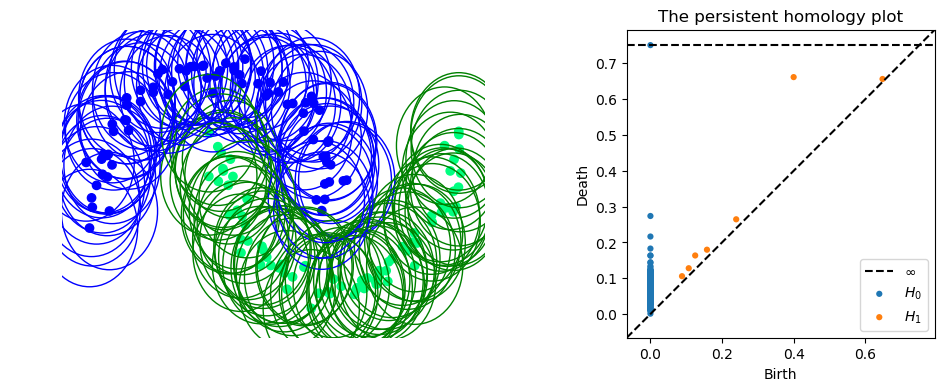

In [845]:
create_moons_with_balls_and_0_1_homologies(150, .06)

Of course topological approach has not 100% accuracy in prediction number of clusters or loops. It's geometrical concept so it depends on noise and shuffle of data, and how much data points are linearly independent somehow. Below examples show better and worse predictions.

In [966]:
def circles_with_balls_and_0_1_homologies(n_samples, noise=.1, radius=np.inf, maxdim=1, factor=0.4):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    data, labels = make_circles(n_samples, noise=noise, shuffle=True, factor=factor)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.title.set_text("make_circle dataset")
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels, cmap=plt.get_cmap('winter'))
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-1]),2)
    second_last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-2]), 2)
    differences = []
    for i in range(n_samples-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    print('The value of radius once the last death occurs, is equal to', last_death, ', the second last death occurs for radius', second_last_death, '.\nThe difference between last two deaths is', np.round(last_death-second_last_death, 5), 'once the average difference between each next two points is', np.round(diff_mean, 5))
    plt.show()

In [965]:
def blobs_with_balls_and_0_1_homologies(n_samples, radius=np.inf, maxdim=1):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    data, labels = make_blobs(n_samples=n_samples, cluster_std=[.5, .5, .5], centers=3)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.title.set_text("make_blobs dataset")
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels, cmap=plt.get_cmap('winter'))
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-1]),2)
    second_last_death = np.round(np.max(np.sort(dgms[0])[:n_samples-2]), 2)
    differences = []
    for i in range(n_samples-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    print('On the below persistent diagram, 0-homologies should suggest 3 clusters in dataset')
    plt.show()

In [961]:
def wine_with_balls_and_0_1_homologies(radius=np.inf, maxdim=1):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    wine = load_wine()
    data, labels = wine.data, wine.target
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels)
    ax1.axis('off')
    ax1.title.set_text("load_wine dataset")
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        elif labels[i]==1:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='r', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    differences = []
    for i in range(len(dgms[0])-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    plt.show()

In [959]:
def cancer_with_balls_and_0_1_homologies(radius=np.inf, maxdim=1):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    cancer = load_breast_cancer()
    data, labels = cancer.data, cancer.target
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.title.set_text("load_breast_cancer dataset")
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels)
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        elif labels[i]==1:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='r', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    differences = []
    for i in range(len(dgms[0])-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    plt.show()

In [968]:
def iris_with_balls_and_0_1_homologies(radius=np.inf, maxdim=1):
    if radius>.4:
        radius_homology=radius
        radius=.4
    else:
        radius_homology=radius
        
    global data, labels
    iris = load_iris()
    data, labels = iris.data, iris.target
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.title.set_text("load_breast_cancer dataset")
    ax1.set_xlim([np.min(data[:,0])-.2, np.max(data[:,0])+.2])
    ax1.set_ylim([np.min(data[:,1])-.2, np.max(data[:,1])+.2])
    ax1.scatter(data[:,0], data[:,1], c=labels)
    ax1.axis('off')
    for i in range(len(data)):
        if labels[i]==0:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='b', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        elif labels[i]==1:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='g', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
        else:
            ball_2d = plt.Circle((data[i,0], data[i,1]), radius, color='r', fill=False, alpha=.5)
            #ax1.add_artist(ball_2d)
    plt.title('The persistent homology plot')
    dgms = ripser(data, maxdim=maxdim, thresh=radius_homology)['dgms']
    plot_diagrams(dgms, show=False, ax=ax2)
    differences = []
    for i in range(len(dgms[0])-2):
        differences.append(np.sort(dgms[0][i+1])-np.sort(dgms[0][i]))
    diff_mean = np.mean(np.array(differences)[:,1])
    plt.show()

The value of radius once the last death occurs, is equal to 0.36 , the second last death occurs for radius 0.28 .
The difference between last two deaths is 0.08 once the average difference between each next two points is 0.00359


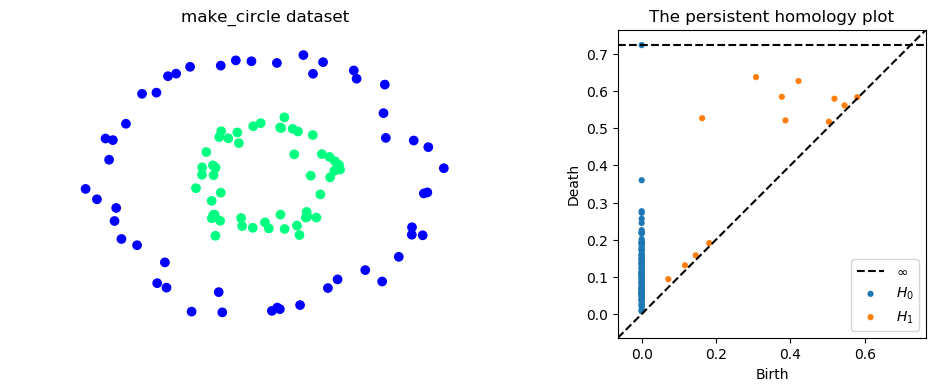

On the below persistent diagram, 0-homologies should suggest 3 clusters in dataset


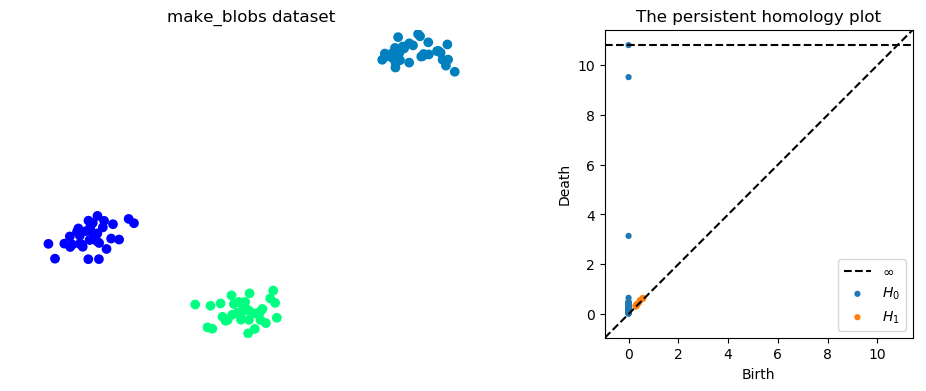

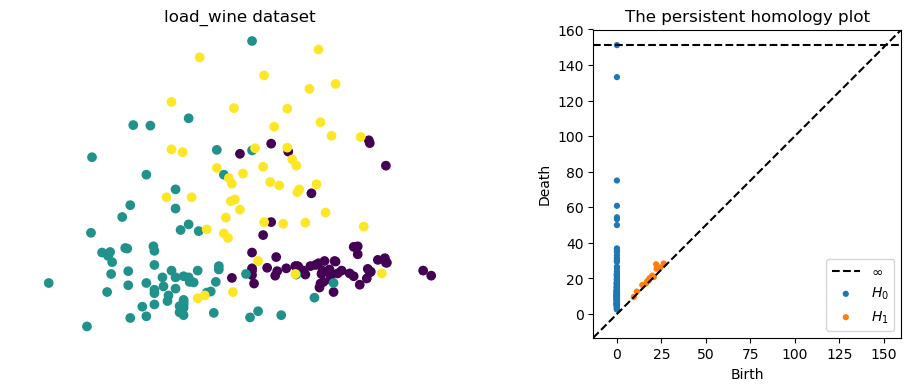

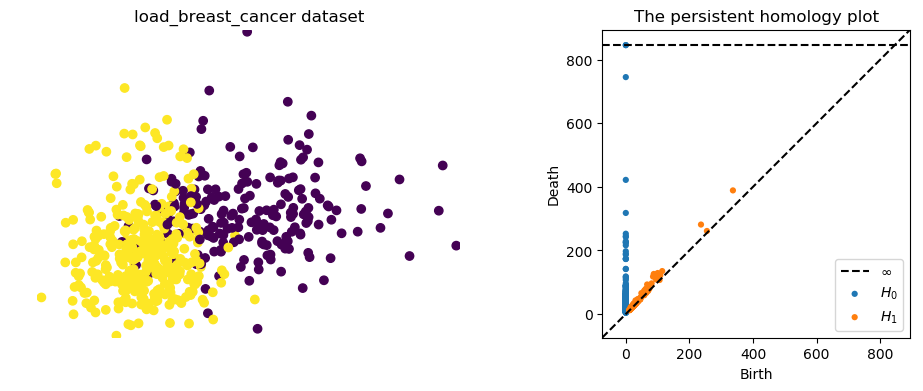

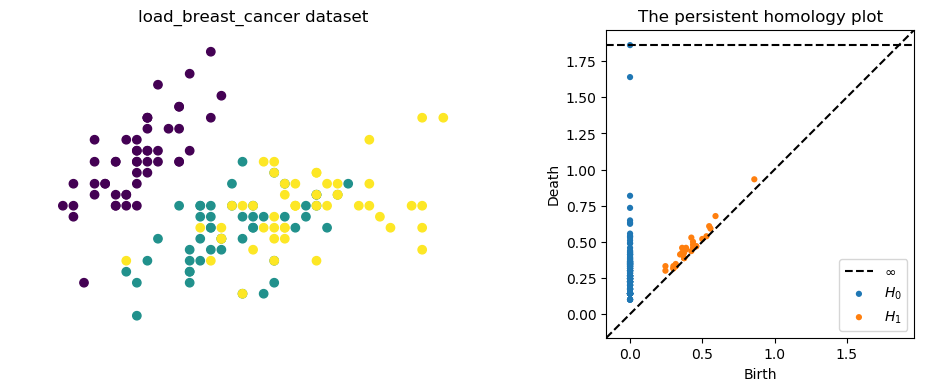

In [971]:
circles_with_balls_and_0_1_homologies(100, 0.06)
blobs_with_balls_and_0_1_homologies(100)
wine_with_balls_and_0_1_homologies()
cancer_with_balls_and_0_1_homologies(800)
iris_with_balls_and_0_1_homologies()

# 6. Conclusion

In general, for high dimensional dataset, one could check higher homology groups and persistent diagram. $H_2$ can be visualize on 3D plot, but there is a problem with $H_3$ and greater ($H_3$ describes loops in $\mathbb{R}^4$, so it's hardly posibble to plot that). In the Ripser module we can set the maximum dimension of homology gruops it counts - $maxdim$ parameter is responsible for that, but starting from $H_2$ and higher, usually it takes a bit more time to compute and plot a persistent diagram. Since I have been studying algebraic topology and (co-)homology theory, I did not expect that such theoretical theories can be applied in data science area. As we can see thie approach is not infallible, but still I think it has some adventages (like stability), that make it interesting. Such analysis can be processed before usual clustering models, like KMeans or Spectral Clustering, it can be used also in time series area (detecting stock market behaviour etc.).